# Label Propagation in Semi-Supervised Learning

First, we can define a synthetic classification dataset using the make_classification() function. We will define the dataset with two classes (binary classification) and two input variables and 1,000 examples. Next, we will split the dataset into train and test datasets with an equal 50-50 split (e.g. 500 rows in each). Finally, we will split the training dataset in half again into a portion that will have labels and a portion that we will pretend is unlabeled.

In [1]:
import matplotlib.pyplot as plt
# prepare semi-supervised learning dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)

Labeled Train Set: (100, 2) (100,)
Unlabeled Train Set: (400, 2) (400,)
Test Set: (500, 2) (500,)


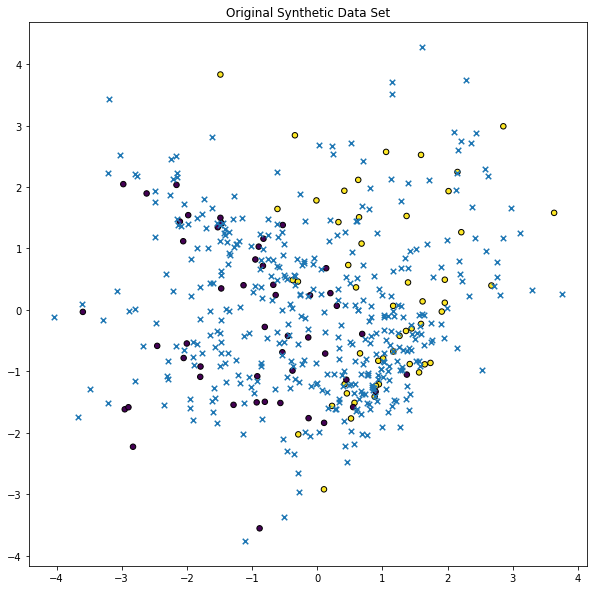

In [2]:
plt.figure(figsize=(10, 10))
plt.title("Original Synthetic Data Set")

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.80, random_state=1, stratify=y_train)
# summarize training set size
print('Labeled Train Set:', X_train_lab.shape, y_train_lab.shape)
print('Unlabeled Train Set:', X_test_unlab.shape, y_test_unlab.shape)
# summarize test set size
print('Test Set:', X_test.shape, y_test.shape)

#Plot data set
plt.scatter(X_train_lab[:, 0], X_train_lab[:, 1], marker="o", c=y_train_lab, s=30, edgecolor="k")
plt.scatter(X_test_unlab[:, 0], X_test_unlab[:, 1], marker="x", s=30)


The results confirm that we have a test dataset of 500 rows, a labeled training dataset of 250 rows, and 250 rows of unlabeled data.
A supervised learning algorithm will only have 250 rows from which to train a model.

A semi-supervised learning algorithm will have the 250 labeled rows as well as the 250 unlabeled rows that could be used in numerous ways to improve the labeled training dataset.

Next, we can establish a baseline in performance on the semi-supervised learning dataset using a supervised learning algorithm fit only on the labeled training data.

This is important because we would expect a semi-supervised learning algorithm to outperform a supervised learning algorithm fit on the labeled data alone. If this is not the case, then the semi-supervised learning algorithm does not have skill.

In this case, we will use a logistic regression algorithm fit on the labeled portion of the training dataset.

### The model can then be used to make predictions on the entire hold out test dataset and evaluated using classification accuracy.

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# define model
model = LogisticRegression()
# fit model on labeled dataset
model.fit(X_train_lab, y_train_lab)
# make predictions on hold out test set
yhat = model.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 82.400


Running the algorithm fits the model on the labeled training dataset and evaluates it on the holdout dataset and prints the classification accuracy.

## The Label Propagation algorithm is available in the scikit-learn Python machine learning library via the LabelPropagation class.

The model can be fit just like any other classification model by calling the fit() function and used to make predictions for new data via the predict() function.

Importantly, the training dataset provided to the fit() function must include labeled examples that are integer encoded (as per normal) and unlabeled examples marked with a label of -1.

The model will then determine a label for the unlabeled examples as part of fitting the model.

After the model is fit, the estimated labels for the labeled and unlabeled data in the training dataset is available via the “transduction_” attribute on the LabelPropagation class.

### First, we must prepare the training dataset.

We can concatenate the input data of the training dataset into a single array.
We can then create a list of -1 valued (unlabeled) for each row in the unlabeled portion of the training dataset.
This list can then be concatenated with the labels from the labeled portion of the training dataset to correspond with the input array for the training dataset.
We can now train the LabelPropagation model on the entire training dataset.
Next, we can use the model to make predictions on the holdout dataset and evaluate the model using classification accuracy.

In [4]:
# evaluate label propagation on the semi-supervised learning dataset
from numpy import concatenate
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)
# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))

# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]
# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))
# define model
model = LabelPropagation()
# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)
# make predictions on hold out test set
yhat = model.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 85.600


Running the algorithm fits the model on the entire training dataset and evaluates it on the holdout dataset and prints the classification accuracy.

### Another approach we can use with the semi-supervised model is to take the estimated labels for the training dataset and fit a supervised learning model.
We can then use these labels along with all of the input data to train and evaluate a supervised learning algorithm, such as a logistic regression model.

The hope is that the supervised learning model fit on the entire training dataset would achieve even better performance than the semi-supervised learning model alone.

In [5]:
# evaluate logistic regression fit on label propagation for semi-supervised learning
from numpy import concatenate
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)
# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))
# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]
# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))
# define model
model = LabelPropagation()
# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)
# get labels for entire training dataset data
tran_labels = model.transduction_
# define supervised learning model
model2 = LogisticRegression()
# fit supervised learning model on entire training dataset
model2.fit(X_train_mixed, tran_labels)
# make predictions on hold out test set
yhat = model2.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 86.200


Running the algorithm fits the semi-supervised model on the entire training dataset, then fits a supervised learning model on the entire training dataset with inferred labels and evaluates it on the holdout dataset, printing the classification accuracy.